In [ ]:
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 485.4/485.4 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 11.7 MB/s eta 0:00:00


**Preprocessing Data**

In [ ]:
from datasets import load_dataset
import re
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import nltk

# Download NLTK data
nltk.download('punkt_tab')
nltk.download('stopwords')

# Muat dataset Rotten Tomatoes
dataset = load_dataset("cornell-movie-review-data/rotten_tomatoes")

# Inisialisasi objek-objek yang diperlukan
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

# Fungsi untuk membersihkan teks
def clean_text(text):
    # Ubah teks menjadi huruf kecil
    text = text.lower()
    # Hilangkan tanda baca
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Hilangkan angka
    text = re.sub(r'\d+', '', text)
    # Tokenisasi kata
    words = word_tokenize(text)
    # Hilangkan stopwords dan lakukan stemming
    words = [stemmer.stem(word) for word in words if word not in stop_words]
    # Gabungkan kembali kata-kata menjadi satu string
    return ' '.join(words)

# Terapkan fungsi pembersihan teks ke dataset
dataset = dataset.map(lambda x: {'text': clean_text(x['text'])})

# Contoh hasil prapemrosesan
print(dataset['train'][0]['text'])


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/7.46k [00:00<?, ?B/s]

train.parquet:   0%|          | 0.00/699k [00:00<?, ?B/s]

validation.parquet:   0%|          | 0.00/90.0k [00:00<?, ?B/s]

test.parquet:   0%|          | 0.00/92.2k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/8530 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/1066 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/1066 [00:00<?, ? examples/s]

Map:   0%|          | 0/8530 [00:00<?, ? examples/s]

Map:   0%|          | 0/1066 [00:00<?, ? examples/s]

Map:   0%|          | 0/1066 [00:00<?, ? examples/s]

rock destin st centuri new conan he go make splash even greater arnold schwarzenegg jeanclaud van damm steven segal


**Bag of Words (BoW)** Bag of Words merepresentasikan teks sebagai vektor berdasarkan frekuensi kata.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# Inisialisasi CountVectorizer
vectorizer = CountVectorizer()
X_bow = vectorizer.fit_transform(dataset['train']['text'])

# Lihat ukuran vektor hasil
print(X_bow.shape)


(8530, 12753)


**TF-IDF (Term Frequency - Inverse Document Frequency)** TF-IDF memberikan bobot yang lebih tinggi untuk kata-kata yang lebih bermakna dalam suatu dokumen.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Inisialisasi TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(dataset['train']['text'])

# Lihat ukuran vektor hasil
print(X_tfidf.shape)


(8530, 12753)


**Word Embeddings (Word2Vec)** Word Embeddings menangkap makna kata berdasarkan konteksnya dalam teks.

In [ ]:
import gensim
from gensim.models import Word2Vec

# Tokenisasi ulang untuk Word2Vec (karena Word2Vec butuh daftar kata, bukan string)
tokenized_texts = [text.split() for text in dataset['train']['text']]

# Latih model Word2Vec
word2vec_model = Word2Vec(sentences=tokenized_texts, vector_size=100, window=5, min_count=2, workers=4)

# Cek representasi vektor dari satu kata (misalnya, "great")
print(word2vec_model.wv['great'])


[-0.26453283  0.49874756  0.3021762   0.13812408  0.03439007 -0.75824225
  0.01096082  1.0280253  -0.4338288  -0.27365315 -0.36960685 -0.6960442
 -0.18218087  0.08244523  0.20947514 -0.33890903 -0.09562263 -0.47792664
  0.07082681 -1.1294153   0.24587516  0.11872669  0.29462302 -0.04770138
 -0.18949544  0.13903369 -0.29022714 -0.311868   -0.33873132 -0.16029288
  0.40724188  0.1911292   0.07571592 -0.33771563  0.02609332  0.37455294
  0.15614885 -0.37621883 -0.18879832 -0.9078939   0.1773058  -0.7050609
 -0.25265092  0.15349625  0.22938634 -0.17302905 -0.5303637   0.10596653
 -0.02040872  0.3128565   0.14826514 -0.13021214 -0.16012466 -0.25236535
 -0.2176576   0.22833791  0.21165566 -0.01913135 -0.50016344  0.18476413
  0.10687807  0.21301457 -0.1653568  -0.00713451 -0.36025774  0.43701717
  0.17393592  0.5093764  -0.51378274  0.5593681  -0.17615531  0.28110757
  0.43127462 -0.1950905   0.46076432  0.29256028 -0.03984419 -0.10122814
 -0.33534703  0.03123545 -0.22298501 -0.18162403 -0.1

**Naïve Bayes** Naïve Bayes adalah algoritma klasifikasi yang cocok untuk teks karena menggunakan asumsi independensi antar kata.

In [ ]:
from datasets import load_dataset
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

# Load dataset Rotten Tomatoes
dataset = load_dataset("rotten_tomatoes")

# Menggunakan hanya teks dan label
X_text = dataset['train']['text']
y_labels = dataset['train']['label']

# Bag of Words (BoW) Vectorization
bow_vectorizer = CountVectorizer()
X_bow = bow_vectorizer.fit_transform(X_text)

# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(X_text)

# Encode label menjadi numerik
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y_labels)

# Bagi dataset menjadi training dan testing
X_train_bow, X_test_bow, y_train, y_test = train_test_split(X_bow, y, test_size=0.2, random_state=42)
X_train_tfidf, X_test_tfidf, _, _ = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

# Training model Naïve Bayes dengan BoW
nb_model_bow = MultinomialNB()
nb_model_bow.fit(X_train_bow, y_train)
y_pred_bow = nb_model_bow.predict(X_test_bow)

# Training model Naïve Bayes dengan TF-IDF
nb_model_tfidf = MultinomialNB()
nb_model_tfidf.fit(X_train_tfidf, y_train)
y_pred_tfidf = nb_model_tfidf.predict(X_test_tfidf)

# Evaluasi model BoW
accuracy_bow = accuracy_score(y_test, y_pred_bow)
precision_bow, recall_bow, f1_bow, _ = precision_recall_fscore_support(y_test, y_pred_bow, average='weighted')

# Evaluasi model TF-IDF
accuracy_tfidf = accuracy_score(y_test, y_pred_tfidf)
precision_tfidf, recall_tfidf, f1_tfidf, _ = precision_recall_fscore_support(y_test, y_pred_tfidf, average='weighted')

# Cetak hasil evaluasi
print("Naïve Bayes Model Performance with BoW:")
print(f"Accuracy: {accuracy_bow:.4f}")
print(f"Precision: {precision_bow:.4f}")
print(f"Recall: {recall_bow:.4f}")
print(f"F1-score: {f1_bow:.4f}\n")

print("Naïve Bayes Model Performance with TF-IDF:")
print(f"Accuracy: {accuracy_tfidf:.4f}")
print(f"Precision: {precision_tfidf:.4f}")
print(f"Recall: {recall_tfidf:.4f}")
print(f"F1-score: {f1_tfidf:.4f}")


README.md:   0%|          | 0.00/7.46k [00:00<?, ?B/s]

train.parquet:   0%|          | 0.00/699k [00:00<?, ?B/s]

validation.parquet:   0%|          | 0.00/90.0k [00:00<?, ?B/s]

test.parquet:   0%|          | 0.00/92.2k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/8530 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/1066 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/1066 [00:00<?, ? examples/s]

Naïve Bayes Model Performance with BoW:
Accuracy: 0.7778
Precision: 0.7779
Recall: 0.7778
F1-score: 0.7778

Naïve Bayes Model Performance with TF-IDF:
Accuracy: 0.7796
Precision: 0.7798
Recall: 0.7796
F1-score: 0.7796


**BERT** BERT adalah model berbasis deep learning yang lebih canggih dalam memahami konteks teks.

In [ ]:
# 📌 1️⃣ Import Library
import os
import torch
from datasets import load_dataset
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification, Trainer, TrainingArguments
from torch.utils.data import Dataset
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# ❌ Menonaktifkan Weights & Biases
os.environ["WANDB_DISABLED"] = "true"

# 📌 2️⃣ Load Dataset Rotten Tomatoes
dataset = load_dataset("cornell-movie-review-data/rotten_tomatoes")

# 📌 3️⃣ Tokenisasi untuk BERT
tokenizer = DistilBertTokenizer.from_pretrained("distilbert-base-uncased")

class RottenTomatoesDataset(Dataset):
    def __init__(self, texts, labels):
        self.encodings = tokenizer(texts, truncation=True, padding=True, max_length=512)
        self.labels = labels

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item["labels"] = torch.tensor(self.labels[idx])  # ✅ Perbaikan format output
        return item

# 📌 4️⃣ Split Data menjadi Train & Test
train_texts, test_texts, train_labels, test_labels = train_test_split(
    dataset['train']['text'], dataset['train']['label'], test_size=0.2, random_state=42
)

train_dataset = RottenTomatoesDataset(train_texts, train_labels)
test_dataset = RottenTomatoesDataset(test_texts, test_labels)

# 📌 5️⃣ Load Model BERT
model = DistilBertForSequenceClassification.from_pretrained("distilbert-base-uncased", num_labels=2)

# 📌 6️⃣ Training Arguments
training_args = TrainingArguments(
    output_dir="./results",
    evaluation_strategy="epoch",  # ✅ Perbaikan parameter
    save_strategy="epoch",
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    num_train_epochs=2,
    logging_dir="./logs",
    report_to="none"  # ✅ Menghindari WANDB Warning
)

# 📌 7️⃣ Trainer API
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
)

# 📌 8️⃣ Fine-Tune BERT
trainer.train()

# 📌 9️⃣ Evaluasi Model BERT
predictions = trainer.predict(test_dataset)
y_preds = torch.argmax(torch.tensor(predictions.predictions), dim=1).numpy()
y_trues = test_labels  # Label asli dari dataset test

# 🔟 Hitung metrik evaluasi
accuracy = accuracy_score(y_trues, y_preds)
precision = precision_score(y_trues, y_preds, average='weighted')
recall = recall_score(y_trues, y_preds, average='weighted')
f1 = f1_score(y_trues, y_preds, average='weighted')

print("\n📊 Evaluasi Model BERT:")
print(f"✅ Accuracy: {accuracy:.4f}")
print(f"✅ Precision: {precision:.4f}")
print(f"✅ Recall: {recall:.4f}")
print(f"✅ F1-score: {f1:.4f}")


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


Epoch,Training Loss,Validation Loss
1,0.486900,0.342386
2,0.222800,0.525043



📊 Evaluasi Model BERT:
✅ Accuracy: 0.8687
✅ Precision: 0.8690
✅ Recall: 0.8687
✅ F1-score: 0.8687


<ipython-input-24-ac9249e508cb>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=accuracy, palette=colors, edgecolor='black')


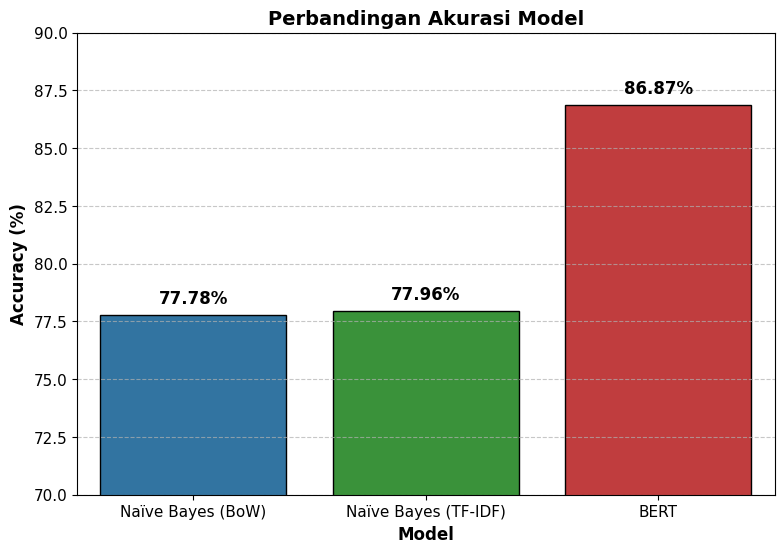

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data hasil evaluasi
models = ['Naïve Bayes (BoW)', 'Naïve Bayes (TF-IDF)', 'BERT']
accuracy = [77.78, 77.96, 86.87]
f1_scores = [77.78, 77.96, 86.87]

# Warna kustom
colors = ['#1f77b4', '#2ca02c', '#d62728']

# Membuat grafik
plt.figure(figsize=(9, 6))
sns.barplot(x=models, y=accuracy, palette=colors, edgecolor='black')

# Menambahkan nilai di atas bar
for i, val in enumerate(accuracy):
    plt.text(i, val + 0.5, f'{val}%', ha='center', fontsize=12, fontweight='bold')

# Kustomisasi tampilan
plt.xlabel('Model', fontsize=12, fontweight='bold')
plt.ylabel('Accuracy (%)', fontsize=12, fontweight='bold')
plt.title('Perbandingan Akurasi Model', fontsize=14, fontweight='bold')
plt.ylim(70, 90)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Menampilkan grafik
plt.show()


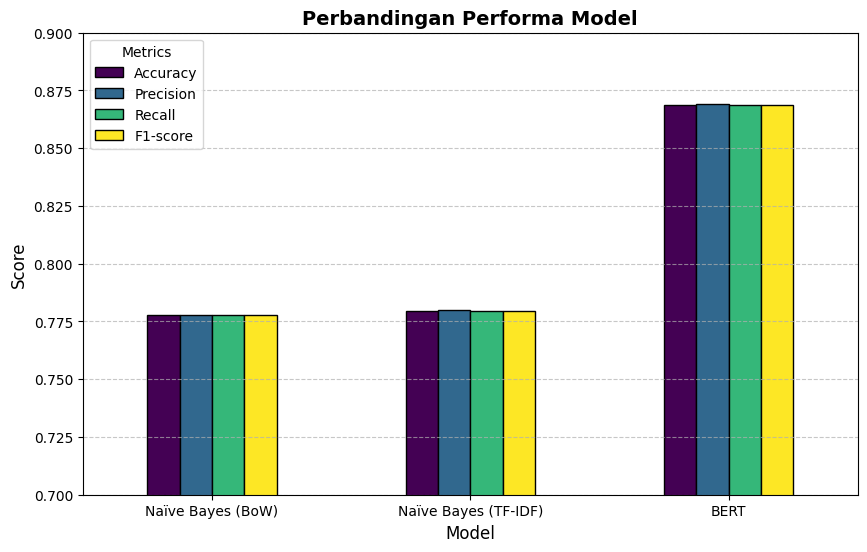

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data hasil evaluasi model
data = {
    'Model': ['Naïve Bayes (BoW)', 'Naïve Bayes (TF-IDF)', 'BERT'],
    'Accuracy': [77.78, 77.96, 86.87],
    'Precision': [77.79, 77.98, 86.90],
    'Recall': [77.78, 77.96, 86.87],
    'F1-score': [77.78, 77.96, 86.87]
}

# Konversi ke DataFrame
df = pd.DataFrame(data)

# Konversi persen ke desimal
df.set_index('Model', inplace=True)
df = df / 100

# Plot
df.plot(kind='bar', figsize=(10, 6), colormap='viridis', edgecolor='black')
plt.title('Perbandingan Performa Model', fontsize=14, fontweight='bold')
plt.xlabel('Model', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.ylim(0.7, 0.9)  # Set batas sumbu y agar lebih jelas
plt.xticks(rotation=0)
plt.legend(title='Metrics')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Tampilkan grafik
plt.show()
